In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
user_rating_df = pd.read_csv('data/Ratings.csv',delimiter=';')

In [4]:
user_rating_df.head(3)

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [5]:
len(user_rating_df['User-ID'].unique()),len(user_rating_df['ISBN'].unique()) #no.of unique users, no.of unique books

(105283, 340556)

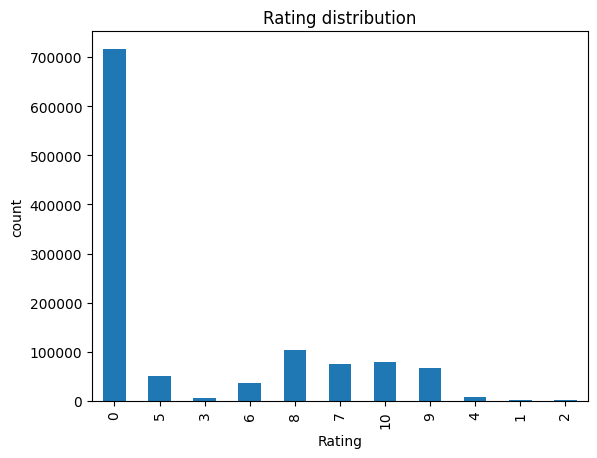

In [6]:
plt.title('Rating distribution')
user_rating_df.Rating.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('count')
plt.savefig('rating-distrib.png',bbox_inches = 'tight')
plt.show()

# Conclusion : Most books are rated 0

In [7]:
user_df = pd.read_csv('data/Users.csv',delimiter=';')
books_df = pd.read_csv('data/Books.csv',delimiter=';')

user_df.shape, books_df.shape

/tmp/ipykernel_8676/3734311811.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_df = pd.read_csv('data/Users.csv',delimiter=';')


((278859, 2), (271379, 5))

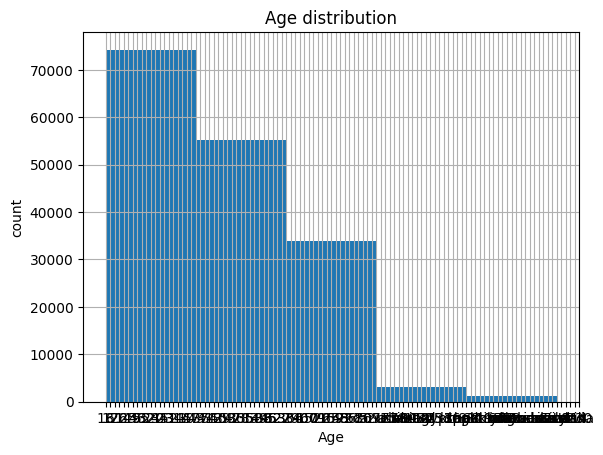

In [8]:
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('count')
user_df.Age.hist(bins=[0,20,40,60,80,100])
plt.savefig('age-distrib.png',bbox_inches = 'tight')
plt.show()

Since the dataset consists of a large number of books and users amongst which there might be books and users which might have very low rating and thus will be of little to no significance to us so excluding books with less than 80 ratings and users with less than 80 ratings

In [9]:
#remove users with less than 80 ratings
counts = user_rating_df['User-ID'].value_counts()  # ratings per userid #  is a df: userid, count
user_rating_df = user_rating_df[user_rating_df['User-ID'].isin(counts[counts>=80].index)]

In [10]:
#remove books with less than 80 ratings
counts = user_rating_df.ISBN.value_counts()
user_rating_df = user_rating_df[user_rating_df.ISBN.isin(counts[counts>=80].index)]

In [11]:
len(user_rating_df['User-ID'].unique()),len(user_rating_df['ISBN'].unique()) # reduced no.of unique users,no.of unique books

(2120, 383)

In [12]:
tot_rating_df = user_rating_df.groupby(by='ISBN')['Rating'].sum().reset_index().rename(columns={'Rating':'TotRating'})

In [13]:
user_rating_df = user_rating_df.merge(tot_rating_df)

In [14]:
user_rating_df.TotRating.value_counts()

326    756
350    686
288    561
500    549
371    541
      ... 
115     82
170     81
276     81
125     80
84      80
Name: TotRating, Length: 252, dtype: int64

In [15]:
# Finding books with sum of total ratings > 20, which implies books with overall least ratings are removed

user_rating_df = user_rating_df[user_rating_df['TotRating']>20] 

In [16]:
len(user_rating_df['User-ID'].unique()),len(user_rating_df['ISBN'].unique()) # reduced no.of unique users,no.of unique books

(2120, 383)

In [17]:
user_id_dict ={}
book_id_dict = {}

for id, user in enumerate(user_rating_df['User-ID'].unique()):
    user_id_dict[user]=id

for id, book in enumerate(user_rating_df['ISBN'].unique()):
    book_id_dict[book]=id

In [18]:
user_book_rating_data = np.array(user_rating_df.drop(columns=['TotRating']))

In [19]:
user_book_rating_data

array([[276925, '002542730X', 10],
       [277427, '002542730X', 10],
       [3363, '002542730X', 0],
       ...,
       [271284, '0671867156', 0],
       [273979, '0671867156', 0],
       [274308, '0671867156', 0]], dtype=object)

In [20]:
for row in user_book_rating_data:
    row[0]= user_id_dict[row[0]]
    row[1]= book_id_dict[row[1]]

In [21]:
user_book_rating_data

array([[0, 0, 10],
       [1, 0, 10],
       [2, 0, 0],
       ...,
       [1316, 382, 0],
       [1216, 382, 0],
       [743, 382, 0]], dtype=object)

In [23]:
pickle.dump(user_book_rating_data,open("reduced_data_np","wb"))  # saving reduced data as np array